<h1>SPEED DATING PROJECT</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [2]:
df= pd.read_csv('Speed_Dating_Data.csv', encoding='ISO8859-1')

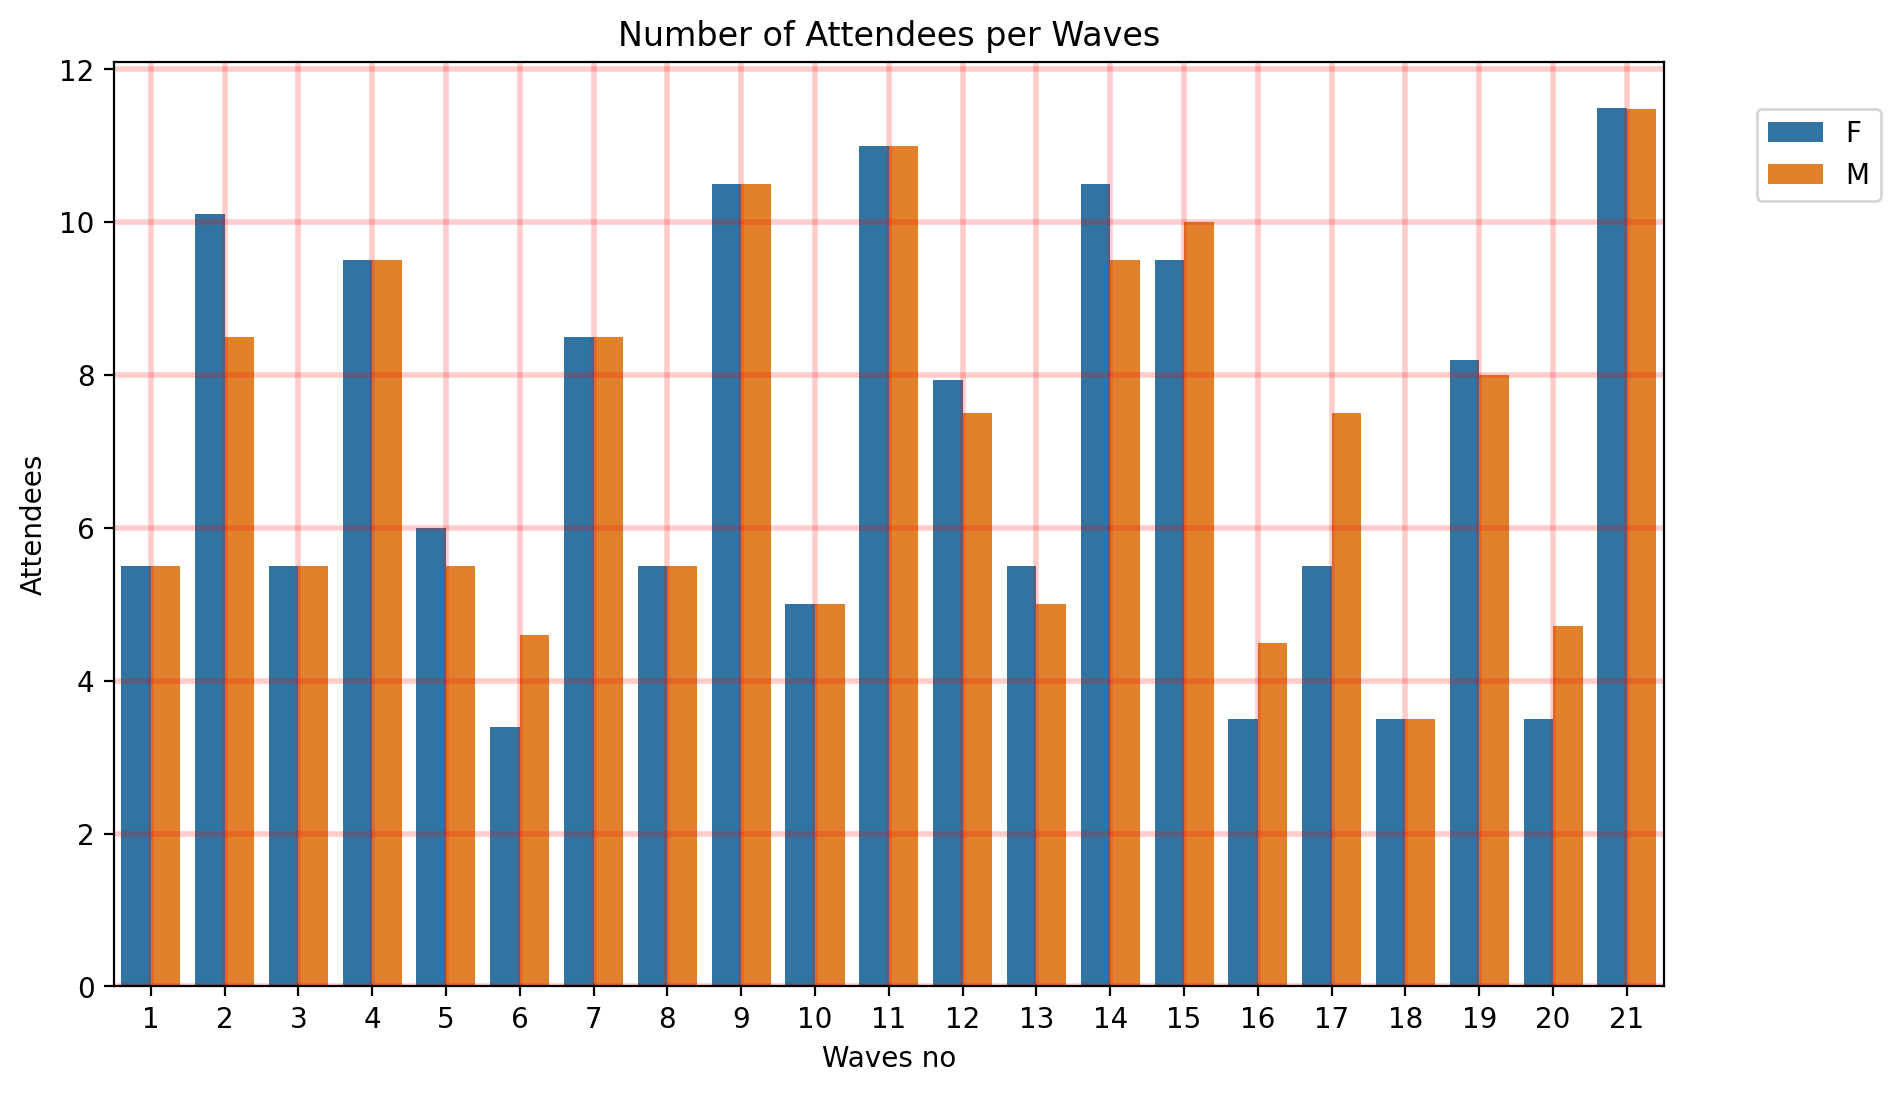

In [8]:
attendees_df= df[['id','wave', 'gender']]
attendees_df['gender']= attendees_df['gender'].map({0:'F', 1:'M'})

plt.figure(figsize=(10,6), dpi=200)

ax=sns.barplot( data=attendees_df, x='wave', y='id', hue='gender', errorbar=('ci', 0)); 

ax.set(xlabel= 'Waves no', ylabel='Attendees',title='Number of Attendees per Waves')
plt.grid(True,color='r', linestyle='-', linewidth=2, alpha= 0.2 )

plt.legend(bbox_to_anchor=[1.1, 0.9], 
           loc='center', );
plt.savefig("attendees.png")

plt.show()

What are the most important attributes for participants (attraction, sincerity, intelligence, fun, ambition, shared interests)?
How do the attribute preferences differ between men and women?

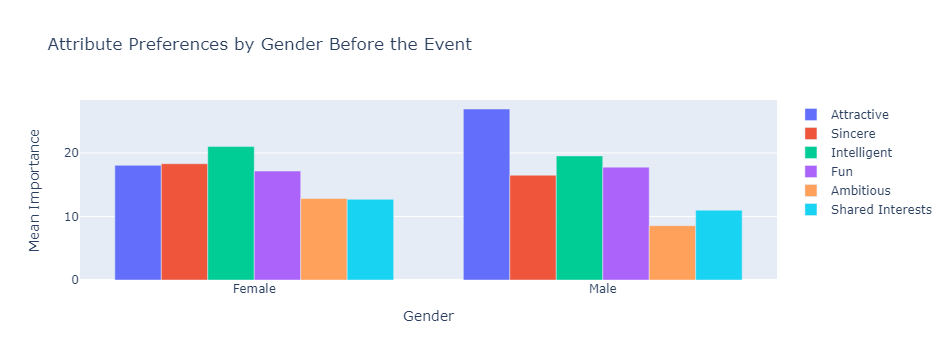

In [6]:
attributes = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']
attribute_labels = ['Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitious', 'Shared Interests']

attr_means = df[attributes].mean()

grouped_data = df.groupby('gender')[attributes].mean().reset_index()

fig = go.Figure()

for i, attr_label in enumerate(attribute_labels):
    fig.add_trace(go.Bar(x=['Female', 'Male'], y=grouped_data[attributes[i]], name=attr_label))

fig.update_layout(title='Attribute Preferences by Gender Before the Event', xaxis_title='Gender', yaxis_title='Mean Importance', barmode='group')
fig.show()

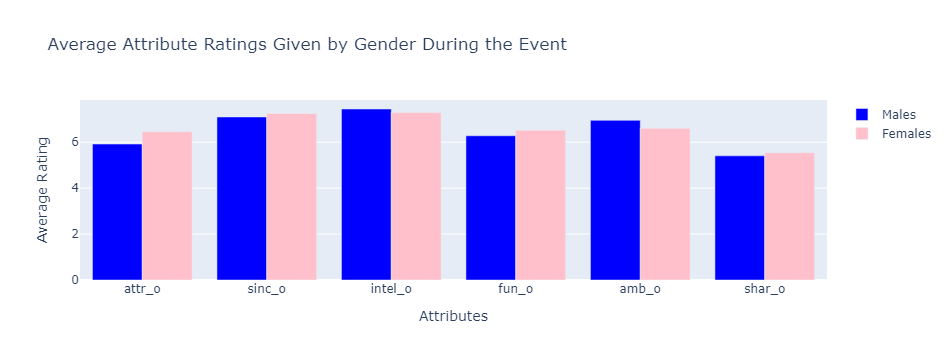

In [7]:

male_avg_ratings = df[df['gender'] == 1][['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o']].mean()

female_avg_ratings = df[df['gender'] == 0][['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o']].mean()

trace1 = go.Bar(
    x=male_avg_ratings.index,
    y=male_avg_ratings.values,
    name='Males',
    marker=dict(color='blue')
)

trace2 = go.Bar(
    x=female_avg_ratings.index,
    y=female_avg_ratings.values,
    name='Females',
    marker=dict(color='pink')
)

data = [trace1, trace2]

layout = go.Layout(
    title='Average Attribute Ratings Given by Gender During the Event',
    xaxis=dict(title='Attributes'),
    yaxis=dict(title='Average Rating'),
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)

fig.show()


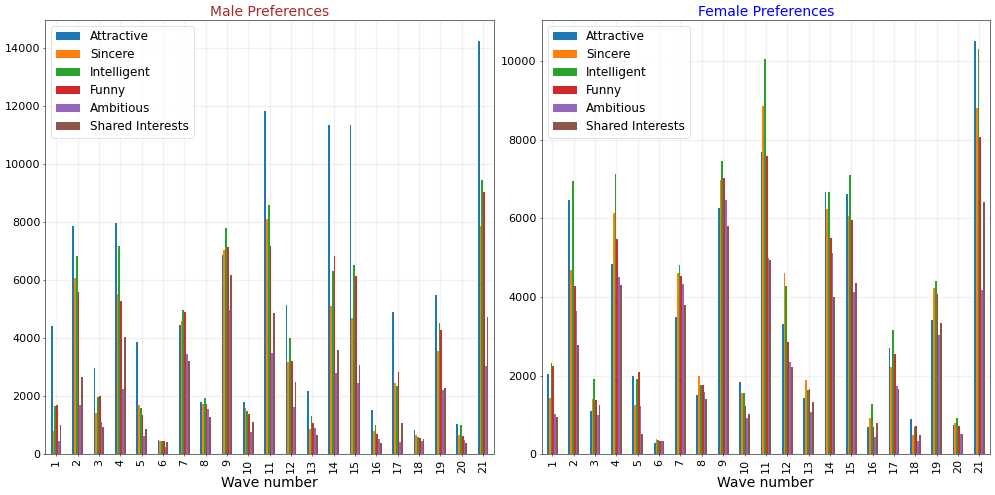

In [9]:
df_most_male= df[df['gender']==1][['attr1_1','sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'wave']]
df_most_female= df[df['gender']==0][['attr1_1','sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'wave']]

df_male_preferences= pd.DataFrame(df_most_male.groupby('wave').sum())
df_female_preferences= pd.DataFrame(df_most_female.groupby('wave').sum())

df_male_preferences= df_male_preferences.rename(columns={'attr1_1':'Attractive','sinc1_1': 'Sincere', 'intel1_1': 'Intelligent', 
                                    'fun1_1':'Funny','amb1_1': 'Ambitious', 'shar1_1':'Shared Interests'})
df_female_preferences= df_female_preferences.rename(columns={'attr1_1':'Attractive','sinc1_1': 'Sincere', 'intel1_1': 'Intelligent', 
                                    'fun1_1':'Funny','amb1_1': 'Ambitious', 'shar1_1':'Shared Interests'})

fig=plt.figure(figsize=(20, 10), dpi=50)

ax1 = fig.add_subplot(121)
df_male_preferences.plot(kind='bar', ax=ax1, fontsize=16)
ax1.set_xlabel('Wave number', fontsize=20)

ax1.set_title('Male Preferences', fontsize= 20, color= 'Brown')
plt.grid(True,color='gray', linestyle='-', linewidth=2, alpha= 0.1 )
plt.legend(fontsize ='xx-large');



ax2 = fig.add_subplot(122)
df_female_preferences.plot(kind='bar', ax=ax2, xlabel='Wave number', fontsize=16)
ax2.set_title('Female Preferences', fontsize= 20, color= 'Blue' )
ax2.set_xlabel('Wave number', fontsize=20)
        

plt.grid(True,color='gray', linestyle='-', linewidth=2, alpha= 0.1 )

plt.legend(fontsize ='xx-large', fancybox = True );

 
plt.tight_layout()
plt.savefig("Preferences.png")

plt.show();


<h3>Information about participants : </h3>

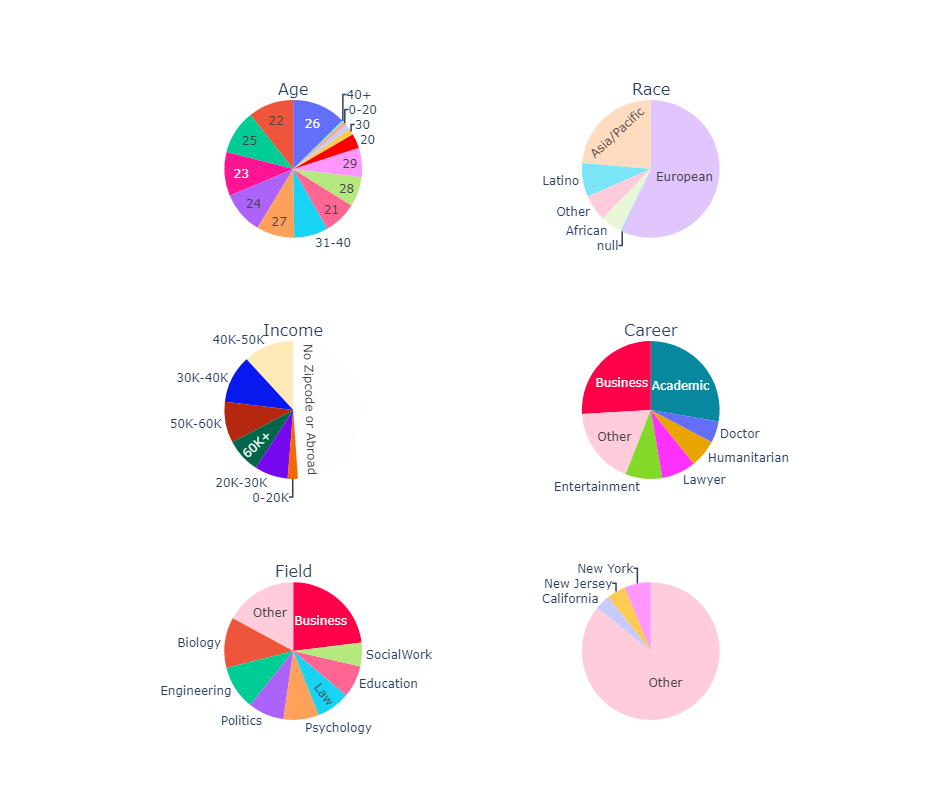

In [60]:
fig= make_subplots(rows=3, cols=2, subplot_titles =['Age', 'Race', 'Income', 'Career', 'Field', ''],
                                  specs=[[{'type': 'domain'}, {'type': 'domain'}],
                                  [{'type': 'domain'}, {'type': 'domain'}],
                                  [{'type': 'domain'}, {'type': 'domain'}]]) ### type: domain = domain is suitable for pie charts
                                                                             ### otherwise code return X/Y apsis values

###Age data == Age_groups

df['Age_groups']=pd.cut(df['age'], bins=[0,20,21,22,23,24,25,26,27,28,29,30,31,40, float('inf')], 
                labels=['0-20', '20','21','22','23','24','25','26','27','28','29','30', '31-40', '40+'])

###Income data

df['income_commas']=df['income'].str.replace(",","")
df['income_numeric']= pd.to_numeric(df['income_commas'], errors='coerce') ### error coerce to convert in Nan values / if ignore to ignore
df['income_numeric']=df['income_numeric'].fillna(0)

df['Income_groups']=pd.cut(df['income_numeric'], bins=[-0.01,1,20000,30000,40000,50000,60000,150000],
                         labels = ['No Zipcode or Abroad','0-20K','20K-30K', '30K-40K', '40K-50K', '50K-60K', '60K+'])
                        ### bins= -1 it is to cover 0 value between -1 1 and return NoZipcode or Abroad on the pie 



###Race Data

race_label= {1:'African',
	2:'European',
	3:'Latino',
	4:'Asia/Pacific',
	5:'Native',
	6:'Other'}

df['race_groups']=df['race'].replace(race_label)

###Career Data

career_c_dict = {
    1: "Lawyer",
    2: "Academic",
    3: "Psychologist",
    4: "Doctor",
    5: "Engineer",
    6: "Entertainment",
    7: "Business",
    8: "Real Estate",
    9: "Humanitarian",
    10: "Undecided",
    11: "Social Work",
    12: "Speech",
    13: "Politics",
    14: "Sports",
    15: "Other",
    16: "Journalism",
    17: "Architecture",
}


df['Career_groups']= df['career_c'].replace(career_c_dict)
df['Career_groups']=df.Career_groups.fillna('Unknown')
career_counts= df['Career_groups'].value_counts(normalize= True)*100
df['Career_populars']= df['Career_groups'].apply(lambda x: 'Other' if career_counts[x]<5 else x)

###Field Data

field_c_dict = {
    1: 'Law',
    2: 'Math',
    3: 'Psychology',
    4: 'Medical',
    5: 'Engineering',
    6: 'Writing',
    7: 'Philosophy',
    8: 'Business',
    9: 'Education',
    10: 'Biology',
    11: 'SocialWork',
    12: 'Undergrad',
    13: 'Politics',
    14: 'Film',
    15: 'Arts',
    16: 'Languages',
    17: 'Architecture',
    18: 'Other'
}

df['Field_Groups']=df['field_cd'].replace(field_c_dict)
df['Field_Groups']=df['Field_Groups'].fillna('Unknown')
field_counts= df['Field_Groups'].value_counts(normalize=True) *100
df['Fields_popular']= df['Field_Groups'].apply(lambda x: 'Other' if field_counts[x]<5 else x)

###From Data

#df['From_groups']

df['From_groups']=df['from'].fillna('Unknown')
from_counts=df['From_groups'].value_counts(normalize= True) * 100 
df['From_popular']= df['From_groups'].apply(lambda x: 'Other' if from_counts[x]<2 else x)

   
colors = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FFC0CB', '#800080', '#FFA500', '#008000', '#FFD700', '#FF0000', '#FF1493', '#00FFFF', '#FF4500', '#8A2BE2']
   
fig1= px.pie(df, names='Age_groups', title= 'Participants Age Groups')
fig1.update_traces(marker=dict(colors=colors), textinfo= 'text')
fig1.update_traces(text= df['Age_groups'])
#fig.update_layout(title='Participants Age Distribution')



fig2=px.pie(df, names='race_groups')
fig2.update_traces(textinfo='label')

fig3=px.pie(df, names='Income_groups')
fig3.update_traces(textinfo='label')

fig4=px.pie(df, names='Career_populars')
fig4.update_traces(textinfo='label')

fig5=px.pie(df, names='Fields_popular')
fig5.update_traces(textinfo='label')

fig6= px.pie(df, names='From_popular')
fig6.update_traces(textinfo='label')


fig.add_trace(fig1.data[0], row=1 , col=1)
fig.add_trace(fig2.data[0], row=1,col=2)
fig.add_trace(fig3.data[0], row=2,col=1)
fig.add_trace(fig4.data[0], row=2, col=2)
fig.add_trace(fig5.data[0], row=3, col=1)
fig.add_trace(fig6.data[0], row=3, col=2)
             

fig.update_layout(height=800, width=800)
fig.update_layout(showlegend=False)



fig.show()

                        
                        

<h1> Match Rates </h1>


<h2> Average Matche Rates/ Average Matche Rates on Different Groups <h2>

In [ ]:
###What are the most importants for matching ? 

In [99]:
len(df)

8378

In [98]:
df[['field_cd', 'age','career_c', 'go_out', 'date', 'goal']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   field_cd  8296 non-null   float64
 1   age       8283 non-null   float64
 2   career_c  8240 non-null   float64
 3   go_out    8299 non-null   float64
 4   date      8281 non-null   float64
 5   goal      8299 non-null   float64
dtypes: float64(6)
memory usage: 392.8 KB


In [102]:
df['Age_groups'] = df['age'].fillna(df['age'].median())
df['Go_out_groups'] = df['go_out'].fillna(df['go_out'].median())
df['Date_groups'] = df['date'].fillna(df['date'].median())
df['Goal_groups'] = df['goal'].fillna(df['goal'].median())


In [103]:
df[['Age_groups', 'Go_out_groups', 'Date_groups', 'Goal_groups']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age_groups     8378 non-null   float64
 1   Go_out_groups  8378 non-null   float64
 2   Date_groups    8378 non-null   float64
 3   Goal_groups    8378 non-null   float64
dtypes: float64(4)
memory usage: 261.9 KB


In [177]:
X = df[['Age_groups', 'Go_out_groups', 'Date_groups', 'Goal_groups']]
y = df['match']

In [178]:
X= pd.get_dummies(X, columns= ['Goal_groups'], drop_first=True)

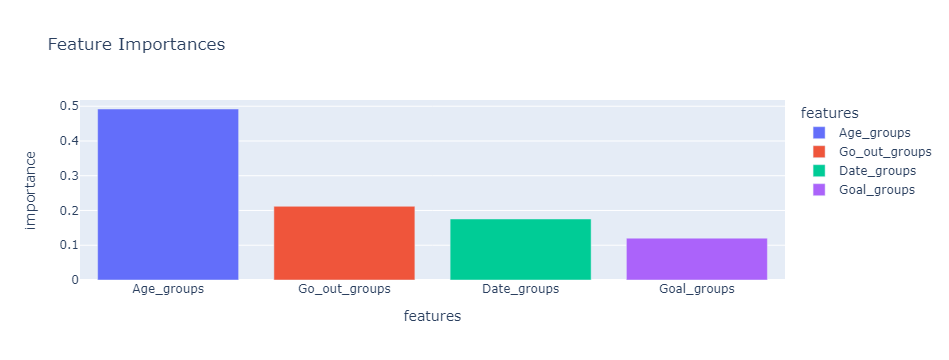

In [152]:
rf = RandomForestClassifier()

rf.fit(X, y)

importances = rf.feature_importances_

goal_importance= importances [-5:].sum()
importances = np.append(importances[:3], goal_importance)

importances_df= pd.DataFrame({'features':['Age_groups', 'Date_groups', 'Go_out_groups', 'Goal_groups'], 'importance' : importances})

importances_df = importances_df.sort_values('importance', ascending=False)


fig = px.bar(importances_df, x='features', y='importance', color='features', title='Feature Importances')
fig.show()


In [179]:
###Logistic Regression 

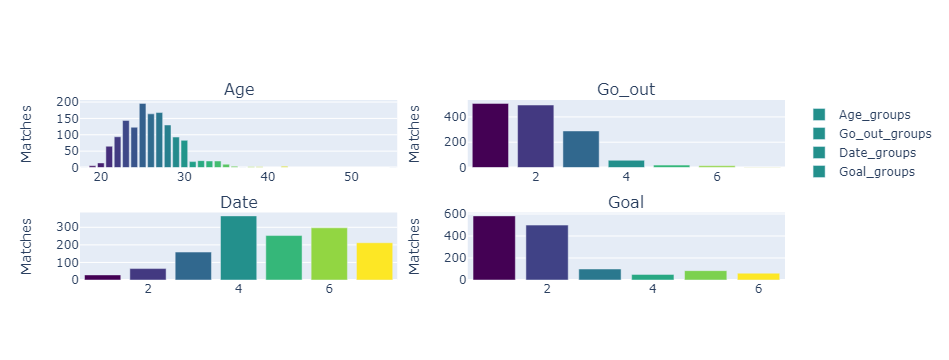

In [244]:
match_groups = df[['Age_groups', 'Go_out_groups', 'Date_groups', 'Goal_groups', 'match']]
cols= ['Age_groups', 'Go_out_groups', 'Date_groups', 'Goal_groups', 'match']
pos=[(1,1), (1,2), (2,1),(2,2)]

fig= make_subplots(rows=2, cols=2, subplot_titles=('Age', 'Go_out', 'Date', 'Goal'))
px.defaults.template = "none"

for col, p in zip(cols, pos):

    fig.add_trace (go.Bar(x= match_groups.groupby(col)['match'].sum().index,
                          y = X.groupby(col)['match'].sum().values,
                          marker=dict(color=np.arange(len(match_groups.groupby(col)['match'].sum().index)), colorscale='Viridis'),
                          name= col),
                   row=p[0], col=p[1]) #in 4 frames, p0 returns 1,1,2,2 and p1 returns 1,2,1,2 
    fig.update_yaxes(title_text='Matches', row=p[0], col=p[1])
                
fig.show()

In [251]:
activities = ['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 
              'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 
              'movies', 'concerts', 'music', 'shopping', 'yoga']
df['mean_rating']= df[activities].mean(axis=1)

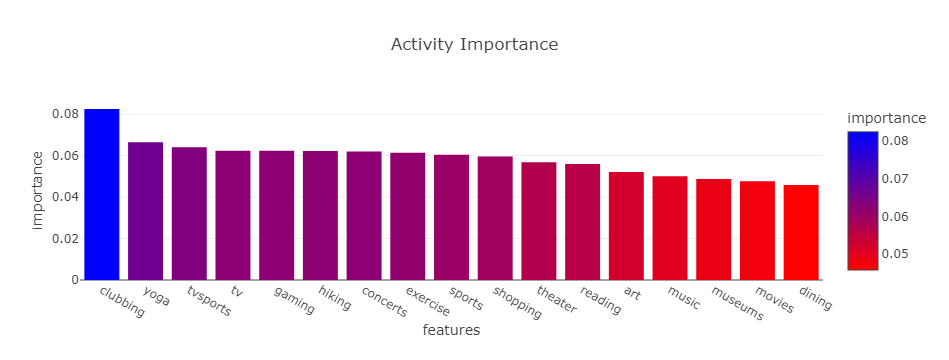

In [265]:
X=df[activities]
y=df.match
X=X.fillna(X.mode().iloc[0]) ### to avoid that mode returns more than 1 reply .iloc[0]

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred=rfc.predict(X_test)

features_importance_df= pd.DataFrame(rfc.feature_importances_, index= X_train.columns, columns=['importance'])
features_importance_df.reset_index(inplace=True)
features_importance_df.columns=['features', 'importance']
features_importance_df= features_importance_df.sort_values('importance', ascending=False)

fig= px.bar(features_importance_df, x='features',y='importance', title= 'Activity Importance', color='importance', color_continuous_scale='Bluered_r')
fig.show()

<h2> A / B Tests </h2>

<h3> As Attractiveness is highly skewed from one group to another we take mode </h3>

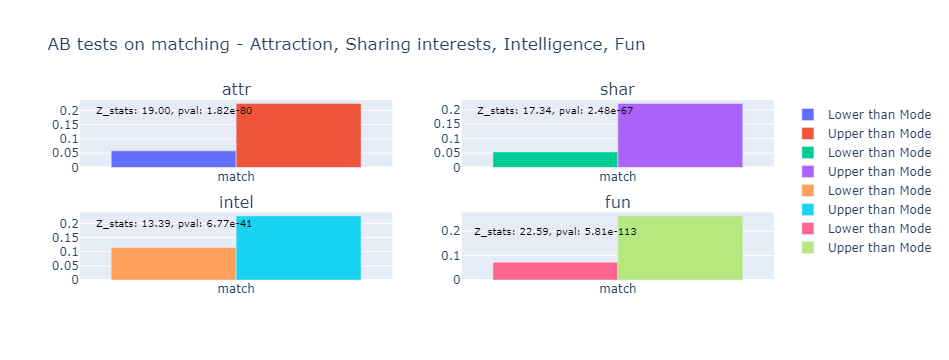

In [4]:
AB_test_list= ['attr', 'shar', 'intel', 'fun']

def generate_bar_chart(feature):
    mode_com = df[feature].mode()[0]

    upper_mod = df[df[feature]>=mode_com]
    lower_mod = df[df[feature]<mode_com]

    upper_sum = upper_mod['match'].sum()
    lower_sum = lower_mod['match'].sum()

    length_upper = len(upper_mod)
    length_lower = len(lower_mod)

    stat, pval = proportions_ztest([upper_sum,lower_sum], [length_upper,length_lower])

    prop_lower = lower_sum/length_lower
    prop_upper = upper_sum/length_upper

    trace1 = go.Bar(name= 'Lower than Mode', x=['match'], y=[prop_lower])
    trace2 = go.Bar(name= 'Upper than Mode', x=['match'], y=[prop_upper])

    data = [trace1, trace2]

    layout = go.Layout(title_text=f'Proportion of matches by the mode of {feature}', xaxis_title='Groups', yaxis_title='Proportion')

    fig = go.Figure(data=data, layout=layout)

    fig.add_annotation(x=-0.2, y=0.2, xref='paper', text=f'Z_stats: {stat:.2f}, pval: {pval:.2e}',
                       showarrow=False, font=dict(color='black', size=10))

    return fig

fig = make_subplots(rows=2,cols=2,subplot_titles=AB_test_list)

for i, feature in enumerate(AB_test_list):
    fig_i = generate_bar_chart(feature)
    for trace in fig_i.data:
        fig.add_trace(trace, row=i//2+1, col=i%2+1)
    for annotation in fig_i.layout.annotations:
        annotation.update(xref=f'x{i+1}', yref=f'y{i+1}')
        fig.add_annotation(annotation)

fig.update_layout(title_text='AB tests on matching - Attraction, Sharing interests, Intelligence, Fun')

fig.show()



In [12]:
attributes = [
    ['attr1_1', 'attr1_2', 'attr1_3'],
    ['sinc1_1', 'sinc1_2', 'sinc1_3'],
    ['intel1_1', 'intel1_2', 'intel1_3'],
    ['fun1_1', 'fun1_2', 'fun1_3'],
    ['amb1_1', 'amb1_2', 'amb1_3'],
    ['shar1_1', 'shar1_2', 'shar1_3']
]


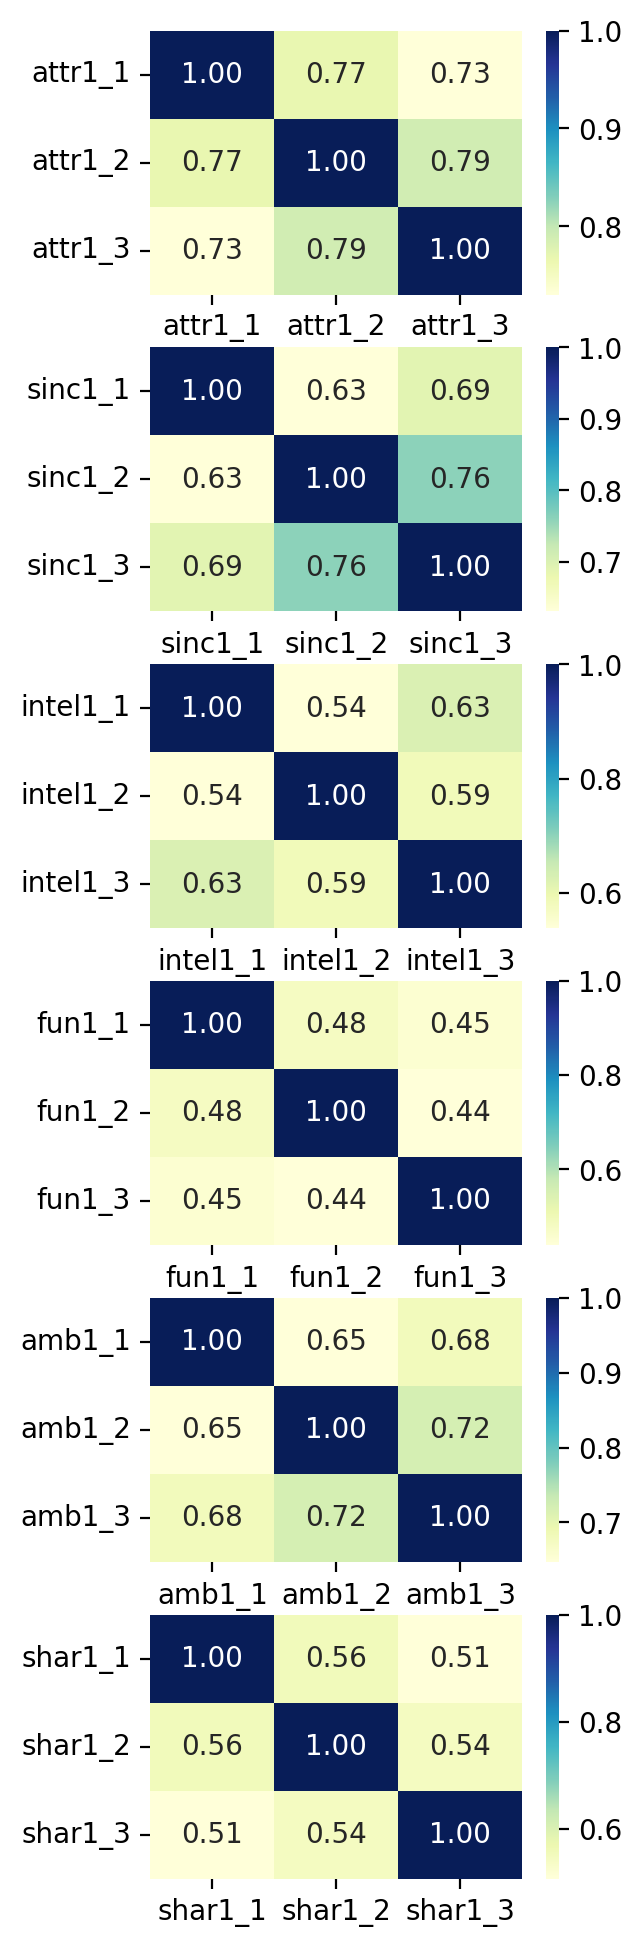

In [29]:
fig, axs= plt.subplots(len(attributes), figsize=(3,12), dpi=200)

for i , attr in enumerate(attributes):
    corr_matrix= df[attr].corr()
    sns.heatmap(corr_matrix, annot= True, fmt='.2f', cmap= 'YlGnBu', ax=axs[i])
    


In [ ]:
#Change in the preference over the time

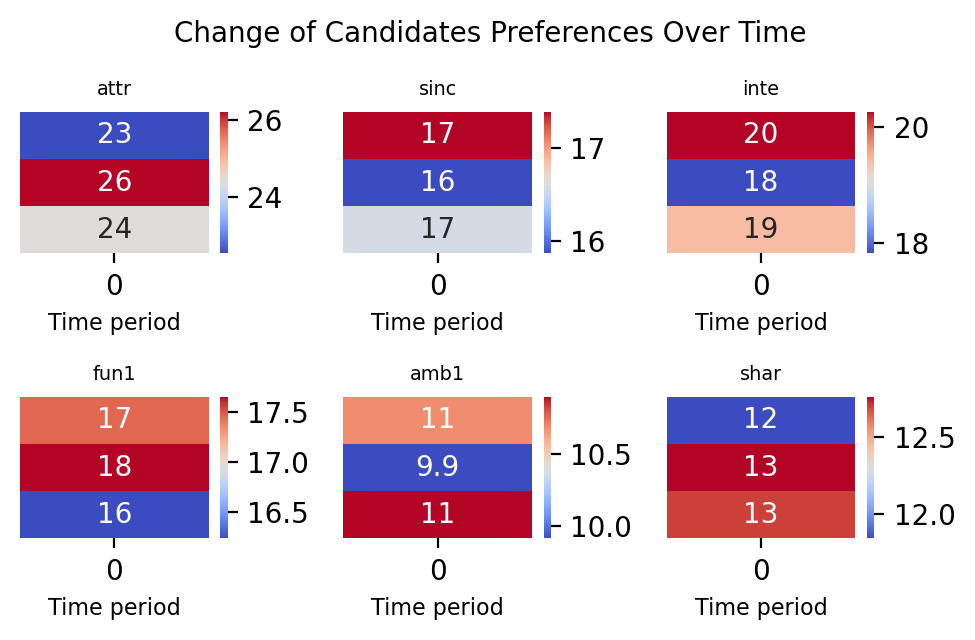

In [13]:

# attributes grouped by category
attributes = [
    ['attr1_1', 'attr1_2', 'attr1_3'],
    ['sinc1_1', 'sinc1_2', 'sinc1_3'],
    ['intel1_1', 'intel1_2', 'intel1_3'],
    ['fun1_1', 'fun1_2', 'fun1_3'],
    ['amb1_1', 'amb1_2', 'amb1_3'],
    ['shar1_1', 'shar1_2', 'shar1_3']
]

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(5, 3), dpi=200)
axs = axs.ravel()  # flatten the subplots array
plt.rcParams.update({'axes.titlesize': 'x-small'})


# calculate mean values for each attribute at each period and plot
for i, attr in enumerate(attributes):
    mean_values = df[attr].mean()
    sns.heatmap(mean_values.to_frame(), cmap='coolwarm', annot=True, ax=axs[i])
    axs[i].set_title( attr[0][:4])
    axs[i].set_xlabel('Time period', fontsize=8)
    axs[i].set_yticks([])  # remove y ticks as they are not meaningful

plt.tight_layout()
plt.suptitle('Change of Candidates Preferences Over Time', fontsize=10, y=1.05)

plt.savefig("Preferences_over_time.png")


plt.show()




In [ ]:
#The way best reflects actual decisions

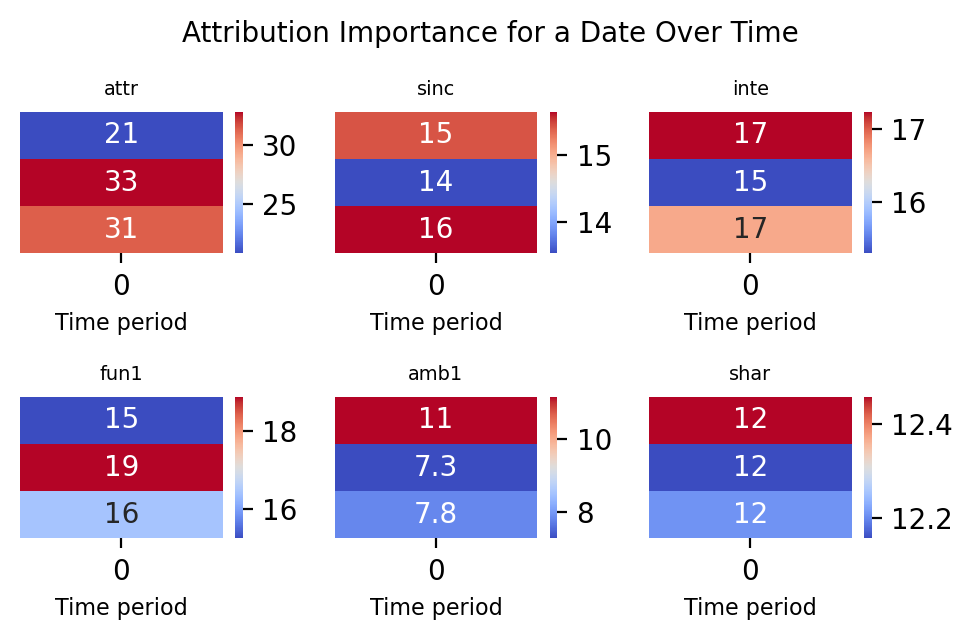

In [14]:
# attributes grouped by category
attributes_2 = [
    ['attr1_s', 'attr7_2', 'attr7_3'],
    ['sinc1_s', 'sinc7_2', 'sinc7_3'],
    ['intel1_s', 'intel7_2', 'intel7_3'],
    ['fun1_s', 'fun7_2', 'fun7_3'],
    ['amb1_s', 'amb7_2', 'amb7_3'],
    ['shar1_s', 'shar7_2', 'shar7_3']
]

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(5, 3), dpi=200)
axs = axs.ravel()  # flatten the subplots array
plt.rcParams.update({'axes.titlesize': 'x-small'})

# calculate mean values for each attribute at each period and plot
for i, attr in enumerate(attributes_2):
    mean_values = df[attr].mean()
    sns.heatmap(mean_values.to_frame(), cmap='coolwarm', annot=True, ax=axs[i])
    axs[i].set_title( attr[0][:4])
    axs[i].set_xlabel('Time period', fontsize=8)
    axs[i].set_yticks([])  # remove y ticks as they are not meaningful

plt.tight_layout()
plt.suptitle('Attribution Importance for a Date Over Time', fontsize=10, y=1.05)
plt.savefig("Dated_preferences_over_time.png")


plt.show()


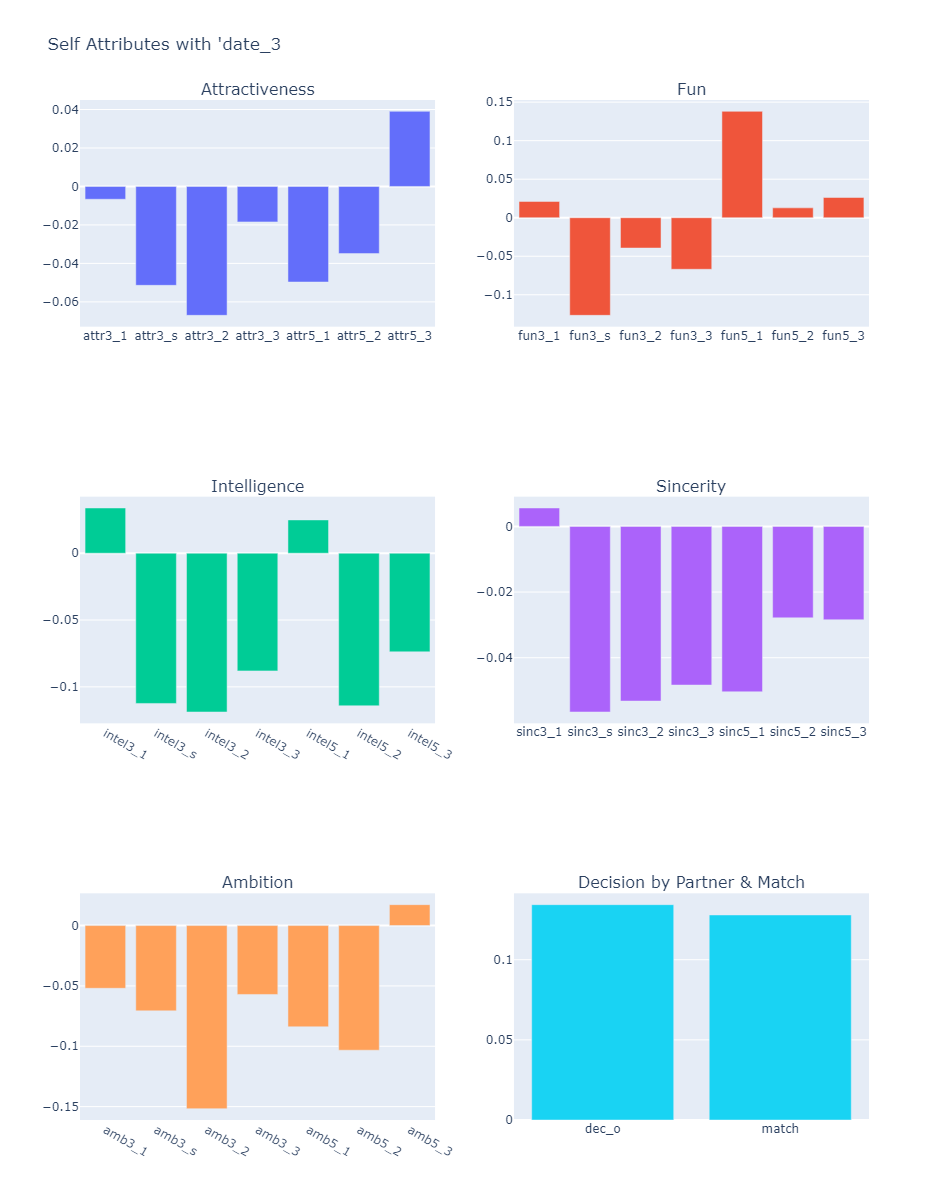

In [5]:
def corr_attributes(attributes):
    corr_self = df[attributes].corr()['date_3']
    corr_self.drop('date_3', inplace=True)
    return corr_self

attributes_s = [
    ['attr3_1', 'attr3_s', 'attr3_2', 'attr3_3', 'attr5_1', 'attr5_2', 'attr5_3'],
    ['fun3_1', 'fun3_s', 'fun3_2', 'fun3_3', 'fun5_1', 'fun5_2', 'fun5_3'],
    ['intel3_1', 'intel3_s', 'intel3_2', 'intel3_3', 'intel5_1', 'intel5_2', 'intel5_3'],
    ['sinc3_1', 'sinc3_s', 'sinc3_2', 'sinc3_3', 'sinc5_1', 'sinc5_2', 'sinc5_3'],
    ['amb3_1', 'amb3_s', 'amb3_2', 'amb3_3', 'amb5_1', 'amb5_2', 'amb5_3'],
    ['dec_o', 'match']
]

fig = make_subplots(rows=3, cols=2, subplot_titles=("Attractiveness", "Fun", "Intelligence", "Sincerity", "Ambition", "Decision by Partner & Match"))

for i, attr_set in enumerate(attributes_s):
    corr_self = corr_attributes(attr_set + ['date_3'])
    
    bar_trace = go.Bar(x=corr_self.index, y=corr_self.values)
    fig.add_trace(bar_trace, row=i//2 + 1, col=i%2 + 1)

fig.update_layout(height=1200, width=900, title_text="Self Attributes with 'date_3 ", showlegend=False)
fig.show()

In [7]:
# Select the relevant features
X = df[['attr1_1', 'fun1_1', 'intel1_1', 'sinc1_1', 'shar1_1','amb1_1','match']].dropna()



Optimization terminated successfully.
         Current function value: 0.689637
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.676280
         Iterations 9


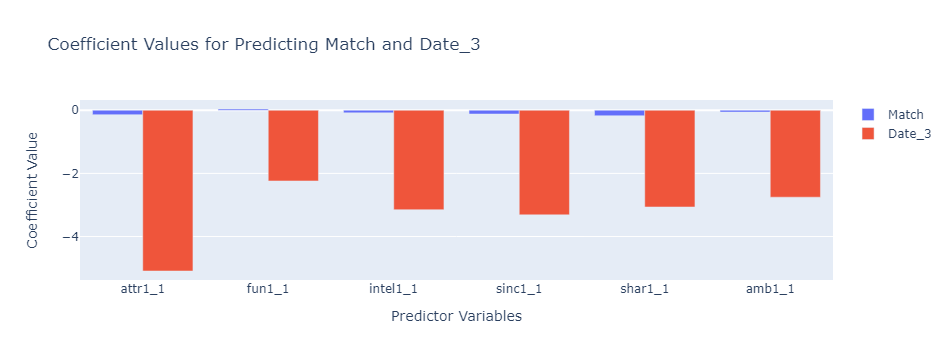

In [24]:
predictors = ['attr1_1', 'fun1_1', 'intel1_1', 'sinc1_1', 'shar1_1', 'amb1_1', 'match', 'date_3']

# Drop missing values from the entire dataset
df_new = df[predictors].dropna()

# Build model for 'match'
X = df_new.drop(['match', 'date_3'], axis=1)
y_match = df_new['match']
y_date3 = df_new['date_3']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Build models with scaled predictors
model_match = sm.Logit(y_match, X_scaled)
result_match = model_match.fit(maxiter=100)

model_date3 = sm.Logit(y_date3, X_scaled)
result_date3 = model_date3.fit(maxiter=100)

coefficients_match = result_match.params
coefficients_date3 = result_date3.params

# Create bar plots
fig = go.Figure()

fig.add_trace(go.Bar(
    x=X.columns,
    y=coefficients_match,
    name='Match'
))

fig.add_trace(go.Bar(
    x=X.columns,
    y=coefficients_date3,
    name='Date_3'
))

fig.update_layout(barmode='group', title_text='Coefficient Values for Predicting Match and Date_3', 
                  xaxis_title='Predictor Variables', 
                  yaxis_title='Coefficient Value')

fig.show()



In [ ]:
###the first notes are reversely productive

Optimization terminated successfully.
         Current function value: 0.691282
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.681984
         Iterations 5


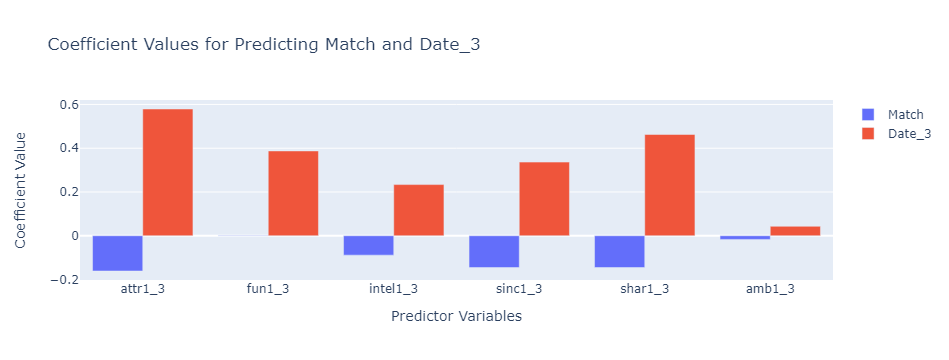

In [25]:
predictors = ['attr1_3', 'fun1_3', 'intel1_3', 'sinc1_3', 'shar1_3', 'amb1_3', 'match', 'date_3']

# Drop missing values from the entire dataset
df_new = df[predictors].dropna()

# Build model for 'match'
X = df_new.drop(['match', 'date_3'], axis=1)
y_match = df_new['match']
y_date3 = df_new['date_3']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Build models with scaled predictors
model_match = sm.Logit(y_match, X_scaled)
result_match = model_match.fit(maxiter=100)

model_date3 = sm.Logit(y_date3, X_scaled)
result_date3 = model_date3.fit(maxiter=100)

coefficients_match = result_match.params
coefficients_date3 = result_date3.params

# Create bar plots
fig = go.Figure()

fig.add_trace(go.Bar(
    x=X.columns,
    y=coefficients_match,
    name='Match'
))

fig.add_trace(go.Bar(
    x=X.columns,
    y=coefficients_date3,
    name='Date_3'
))

fig.update_layout(barmode='group', title_text='Coefficient Values for Predicting Match and Date_3', 
                  xaxis_title='Predictor Variables', 
                  yaxis_title='Coefficient Value')

fig.show()



In [ ]:
#the latest notes are much more productive , aligning with a date decision

C:\Users\serda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\serda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=16.



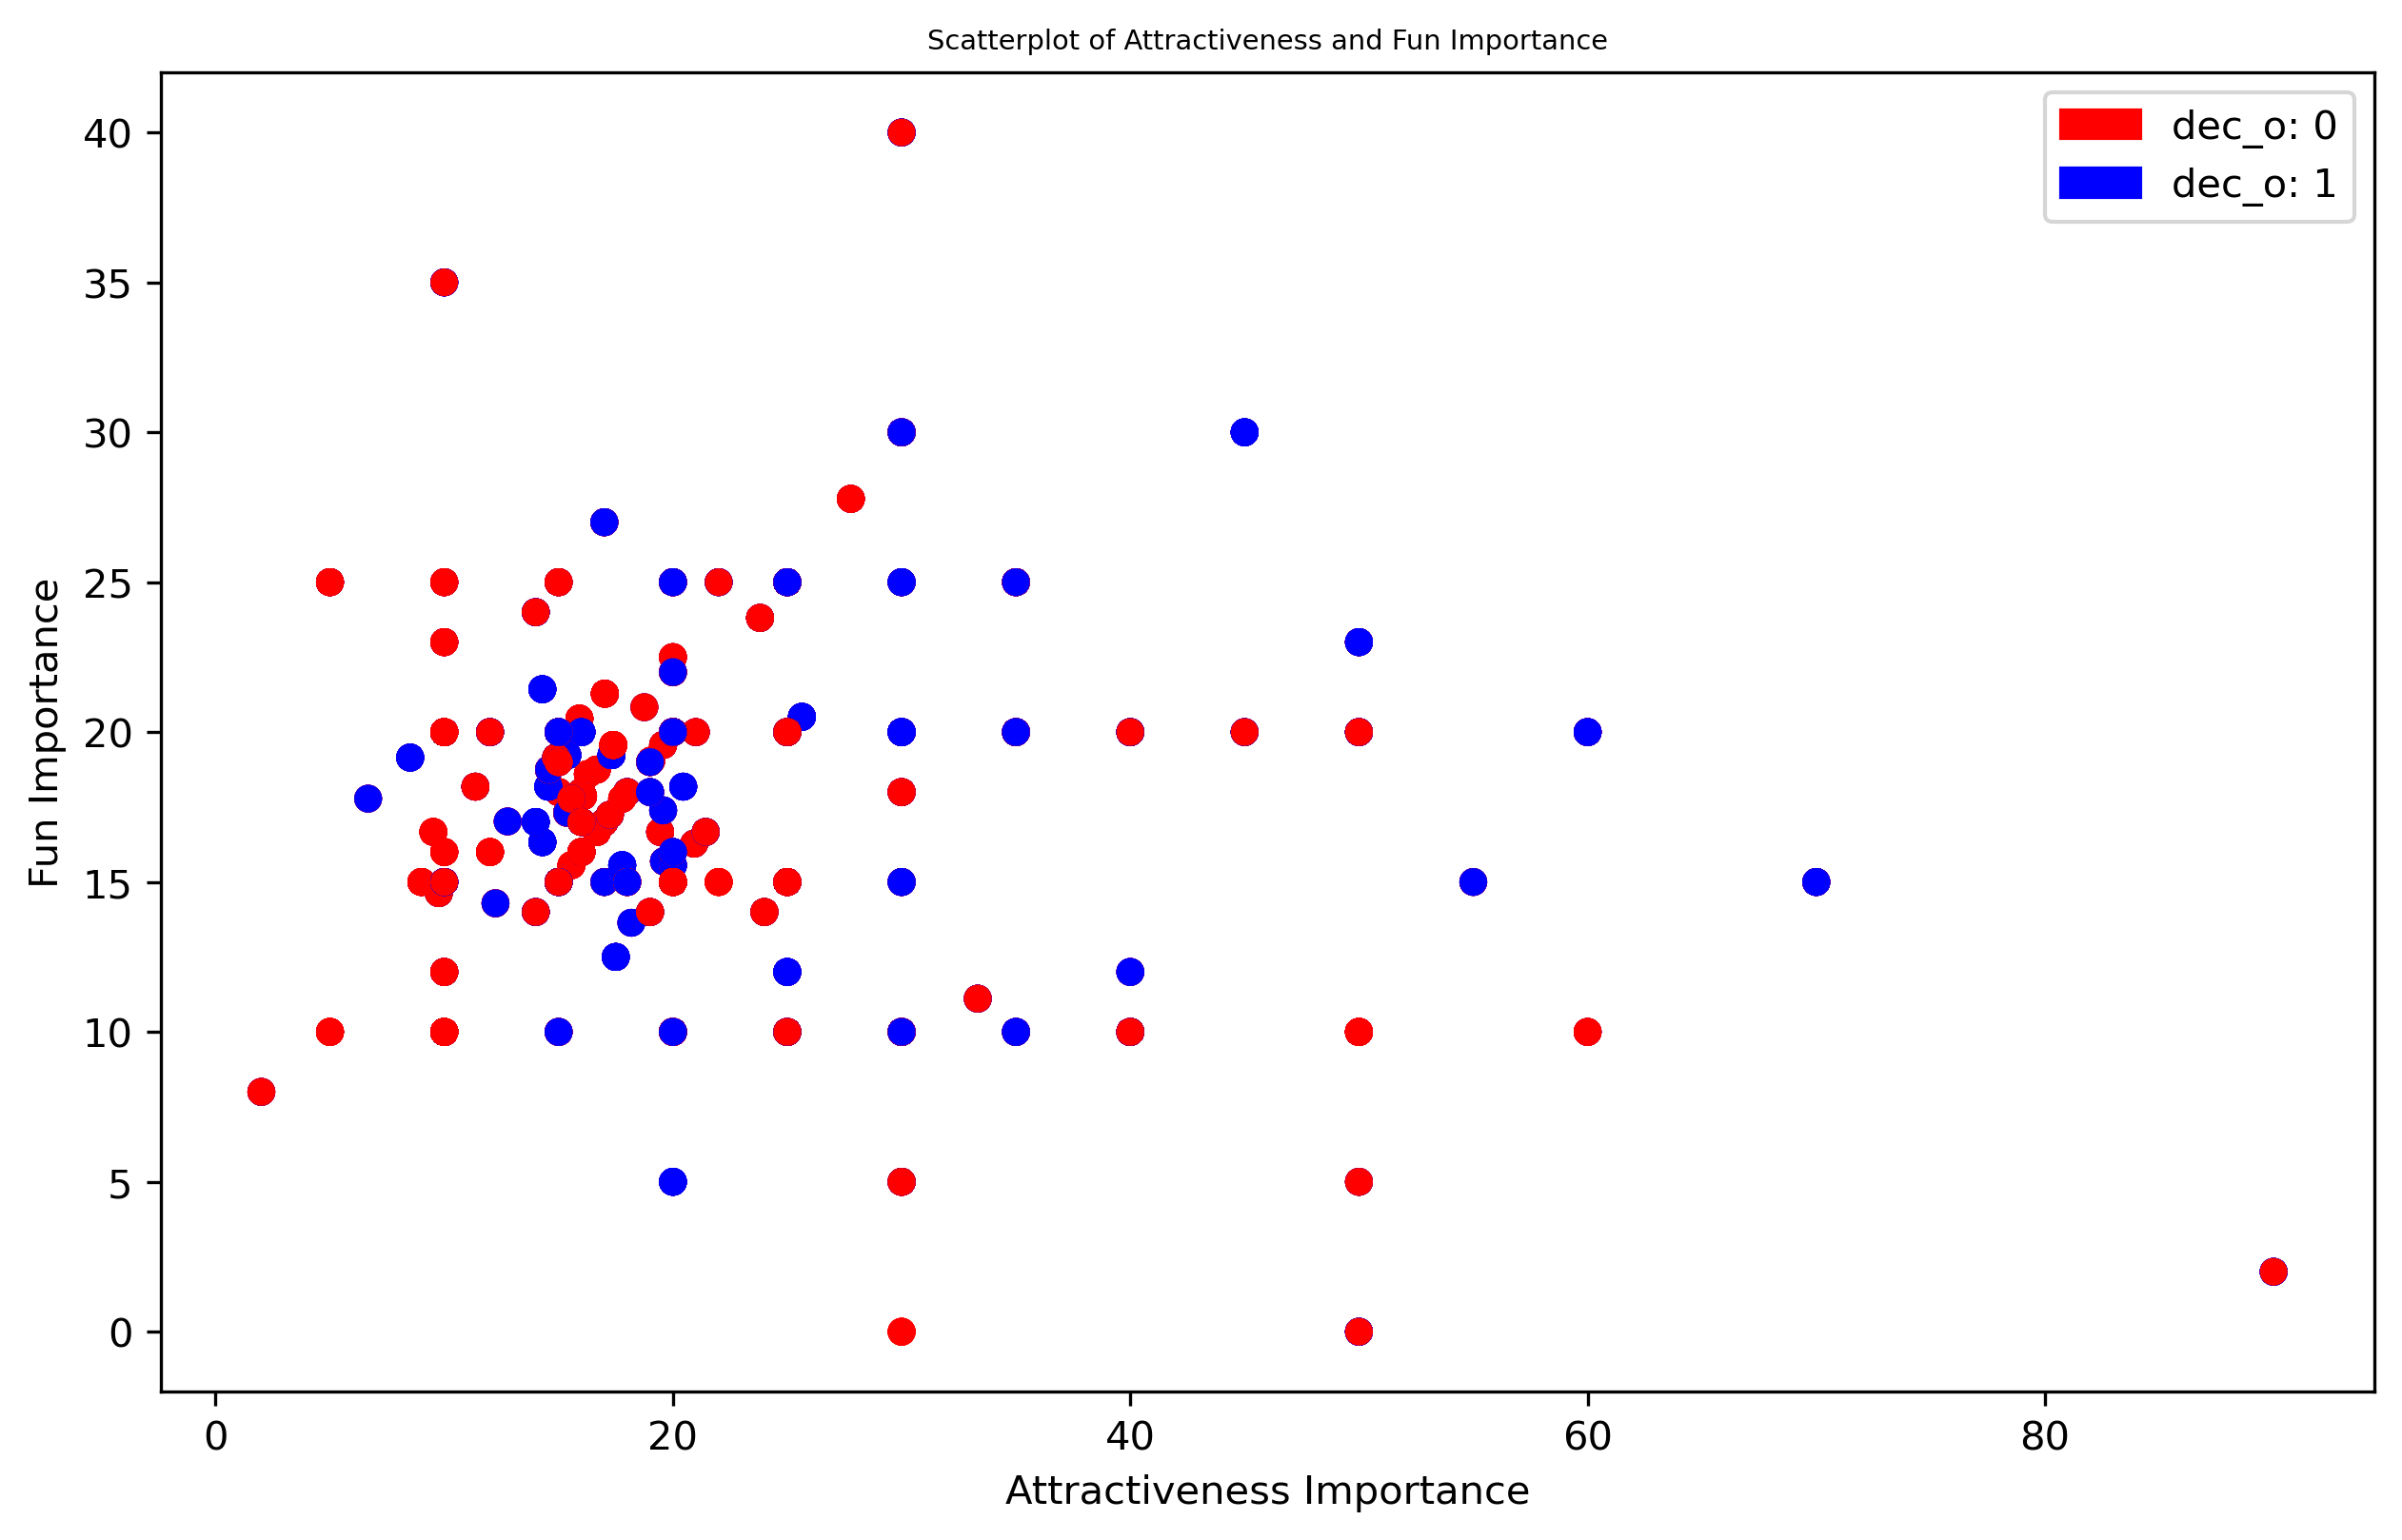

In [20]:
import matplotlib.patches as mpatches

X_bis= df[['attr1_1', 'fun1_1', 'intel1_1', 'sinc1_1', 'shar1_1','amb1_1','match', 'dec_o', 'date_3']].dropna()


X = df[['attr1_1', 'fun1_1','match', 'dec_o', 'date_3']].dropna()

# Create and fit a KMeans model
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# Predict the cluster labels
labels = kmeans.predict(X)

# Create a new dataframe that includes the labels
df_clustered = X.copy()
df_clustered['cluster'] = labels

# Define the color scheme
colors = {0: 'red', 1: 'blue'}

# Create the scatterplot
plt.figure(figsize=(10,6), dpi=300)
plt.scatter(df_clustered['attr1_1'], df_clustered['fun1_1'], c=df_clustered['dec_o'].map(colors))

# Add labels and a legend
plt.xlabel('Attractiveness Importance')
plt.ylabel('Fun Importance')
plt.title('Scatterplot of Attractiveness and Fun Importance')
plt.legend(handles=[mpatches.Patch(color='red', label='dec_o: 0'),
                    mpatches.Patch(color='blue', label='dec_o: 1')])

# Save the figure
plt.savefig('scatterplot_fun.png', dpi=300)

# Show the plot
plt.show()


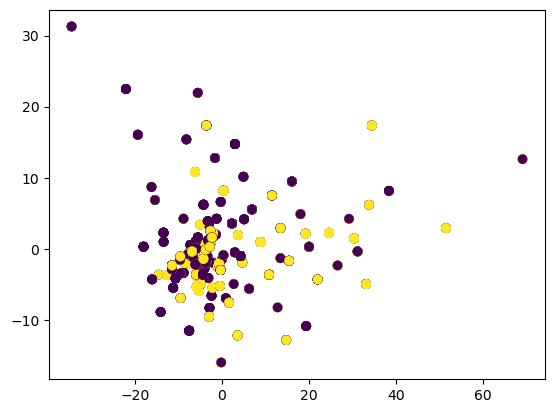

In [16]:
from sklearn.decomposition import PCA

# Fit and transform the data to the first two principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Add the PCA transformed data to the dataframe
df_clustered['PCA1'] = X_pca[:, 0]
df_clustered['PCA2'] = X_pca[:, 1]

# Visualize the clusters using the PCA transformed data
plt.scatter(df_clustered['PCA1'], df_clustered['PCA2'], c=df_clustered['dec_o'])
plt.show()

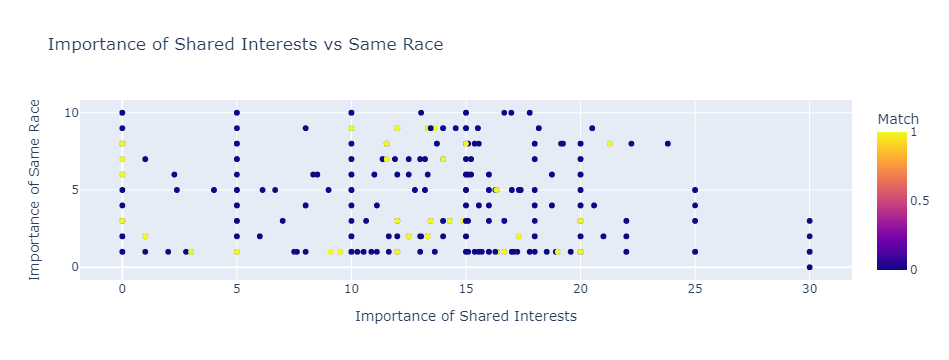

In [21]:
df_filtered = df[['shar1_1', 'imprace', 'match']].dropna()

# Create the scatter plot
fig = px.scatter(df_filtered, x='shar1_1', y='imprace', color='match', labels={
                     "shar1_1": "Importance of Shared Interests",
                     "imprace": "Importance of Same Race",
                     "match": "Match"
                 }, title="Importance of Shared Interests vs Same Race")

fig.show()

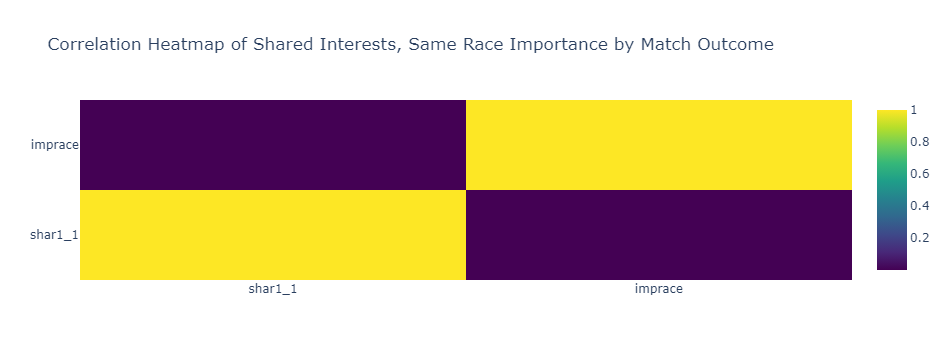

In [22]:
corr_matrix = df_filtered.groupby('match').corr()

# Create a heatmap
fig = go.Figure(data=go.Heatmap(
                   z=corr_matrix,
                   x=corr_matrix.columns,
                   y=corr_matrix.columns,
                   hoverongaps = False,
                   colorscale='Viridis'))

fig.update_layout(title='Correlation Heatmap of Shared Interests, Same Race Importance by Match Outcome')
fig.show()

In [116]:
px.bar(df.groupby('Field_Groups')['match'].mean().reset_index().sort_values('match', ascending=False), x='Field_Groups', y='match', color='Field_Groups')

['iid',
 'id',
 'gender',
 'idg',
 'condtn',
 'wave',
 'round',
 'position',
 'positin1',
 'order',
 'partner',
 'pid',
 'match',
 'int_corr',
 'samerace',
 'age_o',
 'race_o',
 'pf_o_att',
 'pf_o_sin',
 'pf_o_int',
 'pf_o_fun',
 'pf_o_amb',
 'pf_o_sha',
 'dec_o',
 'attr_o',
 'sinc_o',
 'intel_o',
 'fun_o',
 'amb_o',
 'shar_o',
 'like_o',
 'prob_o',
 'met_o',
 'age',
 'field',
 'field_cd',
 'undergra',
 'mn_sat',
 'tuition',
 'race',
 'imprace',
 'imprelig',
 'from',
 'zipcode',
 'income',
 'goal',
 'date',
 'go_out',
 'career',
 'career_c',
 'sports',
 'tvsports',
 'exercise',
 'dining',
 'museums',
 'art',
 'hiking',
 'gaming',
 'clubbing',
 'reading',
 'tv',
 'theater',
 'movies',
 'concerts',
 'music',
 'shopping',
 'yoga',
 'exphappy',
 'expnum',
 'attr1_1',
 'sinc1_1',
 'intel1_1',
 'fun1_1',
 'amb1_1',
 'shar1_1',
 'attr4_1',
 'sinc4_1',
 'intel4_1',
 'fun4_1',
 'amb4_1',
 'shar4_1',
 'attr2_1',
 'sinc2_1',
 'intel2_1',
 'fun2_1',
 'amb2_1',
 'shar2_1',
 'attr3_1',
 'sinc3_1',
 